# Market segmentation - the data below was collected from customers through a phone survey in a retail store to know the loyalty(how frequent theycome ) and level of satisfaction(1-10)

##Lets import the relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Set the styles to Seaborn
sns.set()
# Import the KMeans module so we can perform k-means clustering with sklearn
from sklearn.cluster import KMeans

## Loading the data

In [2]:
# Loading the data
data = pd.read_csv ('3.12. Example.csv')

In [4]:
# Checking what's inside
data.head()

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06


## Plot the data

Create a preliminary plot to see if you can spot something

In [ ]:
# We are creating a scatter plot of the two variables
plt.scatter(data['Satisfaction'],data['Loyalty'])
# Name your axes 
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

## Selecting the features

In [5]:
# features are selected by creating a copy of the data variable
x = data.copy()

## Clustering

In [6]:
# Create an object (which we would call kmeans)
# The number in the brackets is K, or the number of clusters we are aiming for
kmeans = KMeans(2)
# Fit the data
kmeans.fit(x)

KMeans(n_clusters=2)

## Clustering results

In [7]:
# This is  a copy of the input data
clusters = x.copy()
#predicted clusters 
clusters['cluster_pred']=kmeans.fit_predict(x)

Text(0, 0.5, 'Loyalty')

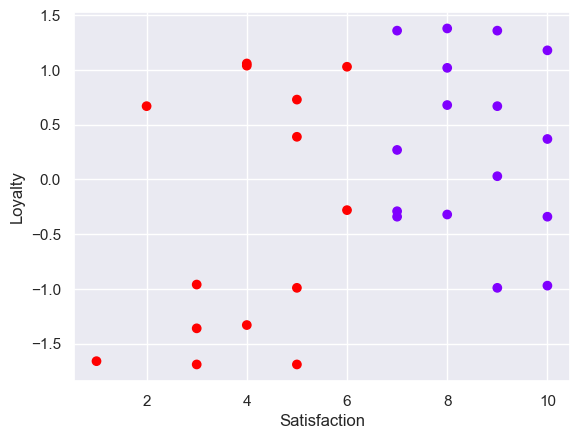

In [8]:
# Ploti=ting the data using the longitude and the latitude
# c (color) is an argument which could be coded with a variable 
# The variable in this case has values 0,1, indicating to plt.scatter, that there are two colors (0,1)
# All points in cluster 0 will be the same colour, all points in cluster 1 - another one, etc.
# cmap is the color map. Rainbow is a nice one, but you can check others here: https://matplotlib.org/users/colormaps.html
plt.scatter(clusters['Satisfaction'],clusters['Loyalty'],c=clusters['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

## Standardizing  the variables

We standardize and check the new result

In [10]:
# Import a library which can do that easily
from sklearn import preprocessing
# inputs are Scaled 
# preprocessing.scale scales each variable (column in x) with respect to itself
# The new result is an array
x_scaled = preprocessing.scale(x)
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

## Taking  advantage of the Elbow method

In [11]:
# we createa an empty list
wcss =[]

# possible cluster solutions with a loop
# I chose 1-9 arbitrarily but one can change
for i in range(1,10):
    # Clsuter solution with i clusters
    kmeans = KMeans(i)
    # Fit the STANDARDIZED data
    kmeans.fit(x_scaled)
    # Append the WCSS for the iteration
    wcss.append(kmeans.inertia_)
    
# Check the result
wcss

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[59.99999999999999,
 29.818973034723143,
 18.058485014940032,
 10.24718180592842,
 7.792695153937187,
 6.569489487091783,
 5.326631124753925,
 4.337110750237059,
 3.8483073210097305]

Text(0, 0.5, 'WCSS')

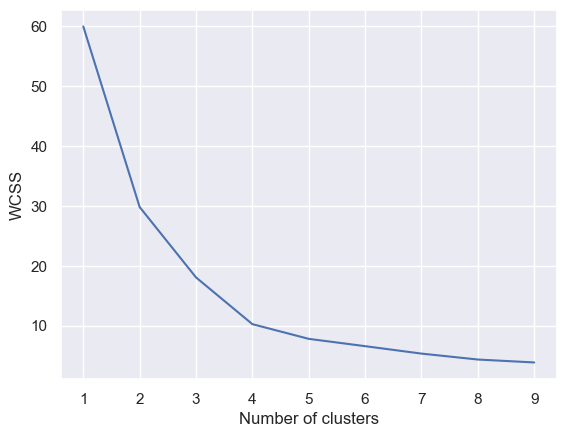

In [12]:
#We plot the number of clusters vs WCSS
plt.plot(range(1,10),wcss)
# Naming the  axes
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

## Exploring clustering solutions and select the number of clusters

In [16]:
# Fiddling with K (the number of clusters)
kmeans_new = KMeans(4)
# Fit the data
kmeans_new.fit(x_scaled)
# We create a new data frame with the predicted clusters
clusters_new = x.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)

In [17]:
# Check if everything seems right
clusters_new

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,1
1,6,-0.28,2
2,5,-0.99,1
3,7,-0.29,2
4,4,1.06,3
5,1,-1.66,1
6,10,-0.97,2
7,8,-0.32,2
8,8,1.02,0
9,8,0.68,0


Text(0, 0.5, 'Loyalty')

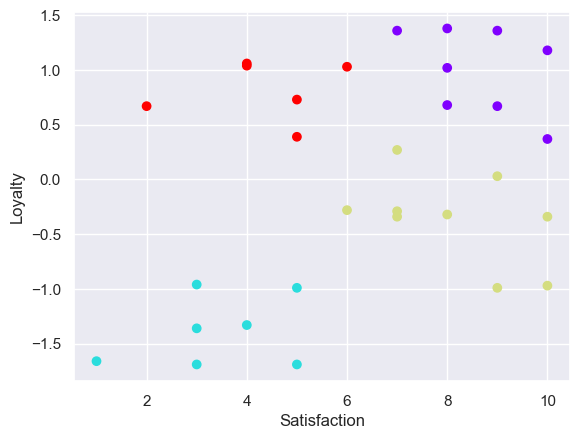

In [18]:
# Plot
plt.scatter(clusters_new['Satisfaction'],clusters_new['Loyalty'],c=clusters_new['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

In [20]:
#From the cluster analysis, it can be seen that customers fall into four major categories,the green 
#cluster represent customers with low satisfaction and Low loyalty-we should not target them in our promotion. 
#The blue cluster cluster represent the 'fans' -customers who are loyal and satisfied,the red cluster are the customers with low satisfaction 
#but high loyalty-these are customers that must be investigated to know why they are not satisfied, maybe shopping experince is 
#not good,the fourth cluster represent customers with high satisfaction but low loyalty-these are called 'roamers', they hardly get 
#satisfied with all products. So we must ensure that we improve satisfaction of the red cluster of customers by streamlining customer
#experience.